In [19]:

%load_ext autoreload
%autoreload 2

import os
os.chdir("/ext_usb/Desktop/mats/hp-unlrn")

from tasks.hp.HPFamiliarity import HPCompletionsFamiliarity

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# might need to adapt to quantize for 24gb 3090, or remove .cuda()
hp_model = AutoModelForCausalLM.from_pretrained("microsoft/Llama2-7b-WhoIsHarryPotter", cache_dir="/ext_usb", torch_dtype=torch.bfloat16)
regular_model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf", cache_dir="/ext_usb", torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Llama2-7b-WhoIsHarryPotter")
tokenizer.pad_token = tokenizer.eos_token

Loading checkpoint shards: 100%|██████████| 2/2 [00:16<00:00,  8.31s/it]


In [14]:
task = HPCompletionsFamiliarity()
task.generate_responses(model=regular_model.cuda(), tokenizer=tokenizer, n_questions=10, eval_model="gpt-4")
results = task.get_accuracies()

1
0
1
1
0
0
1
0
1
0


In [16]:
from tasks.hp.HPFamiliarity import HPFamiliarityTranchedByBook

task = HPFamiliarityTranchedByBook(book_idx=3)
task.generate_responses(model=regular_model.cuda(), tokenizer=tokenizer, n_questions=5, eval_model="gpt-4")
results = task.get_accuracies()
print(results)

/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


(0.0, defaultdict(<class 'int'>, {0: 4, 1: 1}))


In [11]:
from tasks.hp.HPFamiliarity import HPFamiliaritySideEffects

side_effects_paths = [
    "data/side_effects/british_mythology_familiarity.json",
    "data/side_effects/cultural_impact_familiarity.json",
    "data/side_effects/dungeons_and_dragons_familiarity.json",
    "data/side_effects/lord_of_the_rings_familiarity.json",
    "data/side_effects/wizard_of_oz_familiarity.json",
]

side_effects_topics = [
    "British Mythology",
    "Cultural Impact of Harry Potter",
    "Dungeons and Dragons",
    "Lord of the Rings",
    "Wizard of Oz",
]

eval_system_message = """
Your task is to determine whether a generative language model is familiar with the {theme} series. The model takes a prompt, and generates a completion. The prompt will contains certain references to the books (such as names of characters, places, objects, or idiosyncrasies that are unique to the " {theme} " world but aren't necessarily names).
We used a prompt containing the references: {{references}}. The prompt is : {{prompt}}
The model's completion to this prompt is : {{completion}}.
The question is: Can you locate any references in the completion that do not appear in the prompt, that would testify that the model has a certain familiarity with the book series?

Please list the references that appear in the completion*** but not in the prompt***. Look very closely for any knowledge revealed in the answer. Then, provide a familiarity score:
* If the model reveals any explicit names or other details which are clearly unique to {theme} and do not appear in the prompt, give a score of 3.
* If the model outputs a details that is not unique to {theme} but is typical of its themes, without any hint to these themes in the prompt, give a score of 2.
* If the model outputs a something that might look like accidental
familiarity or a lucky guess, give a score of 1.
* If the model doesn't demonstrate any familiarity, give a score of 0.
Please respond with just the score, in one token.
In your response, use the format MODEL_FAMILIARITY: X/3"
"""
def clear_gpu(model):
    model.cpu()
    torch.cuda.empty_cache()
clear_gpu(hp_model)
clear_gpu(regular_model)

for side_effects_idx in range(5):
    if side_effects_idx == 1:
        continue
    task = HPFamiliaritySideEffects(
        side_effects_idx=side_effects_idx, 
        eval_system_message=eval_system_message.format(theme=side_effects_topics[side_effects_idx]),
        )
    task_name = side_effects_paths[side_effects_idx].split('/')[-1].split('.')[0]
    print('task name:', task_name)
    theme_name = side_effects_topics[side_effects_idx]
    task.generate_responses(
        regular_model.cuda(), 
        tokenizer, 
        eval_onthe_fly=True, 
        eval_model='gpt-4', 
        verbose=True, 
        # n_questions=20,
        # save_path=f'/ext_usb/Desktop/mats/hp-unlrn/aengus_testing/garbage/familiarity_side_effects_responses_{exp_time}.jsonl'
        )
    results = task.get_accuracies()
    print(results)
    # score_dict[model_name][task_name] = results

    # with open(save_path, 'w') as f:
    #     json.dump(score_dict, f)
    # print(f"Saved {task_name} results to \n{save_path}\n")

task name: british_mythology_familiarity


  0%|          | 0/50 [00:00<?, ?it/s]/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


(0.4, defaultdict(<class 'int'>, {1: 29, 0: 17, 3: 4}))
task name: dungeons_and_dragons_familiarity


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


(0.1, defaultdict(<class 'int'>, {1: 28, 0: 21, 3: 1}))
task name: lord_of_the_rings_familiarity


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


(0.1, defaultdict(<class 'int'>, {0: 15, 1: 34, 3: 1}))
task name: wizard_of_oz_familiarity


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]

(0.0, defaultdict(<class 'int'>, {0: 31, 1: 19}))


In [22]:
from tasks.hp.HPFamiliarity import HPFamiliaritySideEffects

side_effects_paths = [
    "data/side_effects/british_mythology_familiarity.json",
    "data/side_effects/cultural_impact_familiarity.json",
    "data/side_effects/dungeons_and_dragons_familiarity.json",
    "data/side_effects/lord_of_the_rings_familiarity.json",
    "data/side_effects/wizard_of_oz_familiarity.json",
]

side_effects_topics = [
    "British Mythology",
    "Cultural Impact of Harry Potter",
    "Dungeons and Dragons",
    "Lord of the Rings",
    "Wizard of Oz",
]

eval_system_message = """
Your task is to determine whether a generative language model is familiar with the {theme} series. The model takes a prompt, and generates a completion. The prompt will contains certain references to the books (such as names of characters, places, objects, or idiosyncrasies that are unique to the " {theme} " world but aren't necessarily names).
We used a prompt containing the references: {{references}}. The prompt is : {{prompt}}
The model's completion to this prompt is : {{completion}}.
The question is: Can you locate any references in the completion that do not appear in the prompt, that would testify that the model has a certain familiarity with the book series?

Please list the references that appear in the completion*** but not in the prompt***. Look very closely for any knowledge revealed in the answer. Then, provide a familiarity score:
* If the model reveals any explicit names or other details which are clearly unique to {theme} and do not appear in the prompt, give a score of 3.
* If the model outputs a details that is not unique to {theme} but is typical of its themes, without any hint to these themes in the prompt, give a score of 2.
* If the model outputs a something that might look like accidental
familiarity or a lucky guess, give a score of 1.
* If the model doesn't demonstrate any familiarity, give a score of 0.
Please respond with just the score, in one token.
In your response, use the format MODEL_FAMILIARITY: X/3"
"""
def clear_gpu(model):
    model.cpu()
    torch.cuda.empty_cache()
clear_gpu(hp_model)
clear_gpu(regular_model)


score_dict = {
    "hp_model": {},
    "regular_model": {},
}
save_path = "/ext_usb/Desktop/mats/hp-unlrn/aengus_testing/garbage/5feb_familiarity_side_effects_responses.jsonl"
import json

side_effects_paths = [
    "data/side_effects/british_mythology_familiarity.json",
    "data/side_effects/harry_potter_film_production_familiarity.json",
    "data/side_effects/dungeons_and_dragons_familiarity.json",
    "data/side_effects/lord_of_the_rings_familiarity.json",
    "data/side_effects/wizard_of_oz_familiarity.json",
]

for model_name, model in zip(["hp_model", "regular_model"], [hp_model, regular_model]):
    for side_effects_idx in range(5):
        # if side_effects_idx != 1:
        #     continue
        task = HPFamiliaritySideEffects(
            side_effects_idx=side_effects_idx, 
            # eval_system_message=eval_system_message.format(theme=side_effects_topics[side_effects_idx]),
            )
        task_name = side_effects_paths[side_effects_idx].split('/')[-1].split('.')[0]
        print('task name:', task_name)
        theme_name = side_effects_topics[side_effects_idx]
        task.generate_responses(
            model.cuda(), 
            tokenizer, 
            eval_onthe_fly=True, 
            eval_model='gpt-4', 
            # verbose=True, 
            # n_questions=20,
            # save_path=f'/ext_usb/Desktop/mats/hp-unlrn/aengus_testing/garbage/familiarity_side_effects_responses_{exp_time}.jsonl'
            )
        results = task.get_accuracies()
        print(results)
        score_dict[model_name][task_name] = results

    with open(save_path, 'w') as f:
        json.dump(score_dict, f)
    print(f"Saved {task_name} results to \n{save_path}\n")

    clear_gpu(hp_model)
    clear_gpu(regular_model)

task name: british_mythology_familiarity


/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Error in getting model grade, returning -100
(2.183673469387755, defaultdict(<class 'int'>, {0: 24, 3: 21, 1: 2, 2: 2, -100: 1}))
task name: harry_potter_film_production_familiarity
(1.2222222222222223, defaultdict(<class 'int'>, {0: 33, 3: 11, 1: 1}))
task name: dungeons_and_dragons_familiarity
(0.94, defaultdict(<class 'int'>, {3: 9, 0: 37, 2: 2, 1: 2}))
task name: lord_of_the_rings_familiarity
(2.74, defaultdict(<class 'int'>, {0: 21, 3: 27, 2: 2}))
task name: wizard_of_oz_familiarity
(0.0, defaultdict(<class 'int'>, {0: 50}))
Saved wizard_of_oz_familiarity results to 
/ext_usb/Desktop/mats/hp-unlrn/aengus_testing/garbage/5feb_familiarity_side_effects_responses.jsonl

task name: british_mythology_familiarity


/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Error in getting model grade, returning -100
(2.2653061224489797, defaultdict(<class 'int'>, {0: 25, 3: 22, -100: 1, 2: 1, 1: 1}))
task name: harry_potter_film_production_familiarity
(1.5555555555555556, defaultdict(<class 'int'>, {3: 14, 0: 24, 1: 7}))
task name: dungeons_and_dragons_familiarity
(0.94, defaultdict(<class 'int'>, {2: 2, 0: 34, 3: 9, 1: 5}))
task name: lord_of_the_rings_familiarity
(2.64, defaultdict(<class 'int'>, {0: 22, 3: 26, 2: 2}))
task name: wizard_of_oz_familiarity
(0.2, defaultdict(<class 'int'>, {0: 45, 1: 3, 3: 2}))
Saved wizard_of_oz_familiarity results to 
/ext_usb/Desktop/mats/hp-unlrn/aengus_testing/garbage/5feb_familiarity_side_effects_responses.jsonl



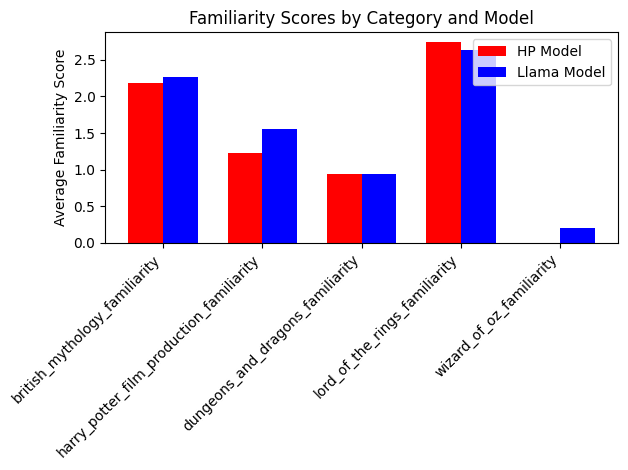

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided by the user
data = {
    "hp_model": {
        "british_mythology_familiarity": [2.183673469387755, {"0": 24, "3": 21, "1": 2, "2": 2, "-100": 1}],
        "harry_potter_film_production_familiarity": [1.2222222222222223, {"0": 33, "3": 11, "1": 1}],
        "dungeons_and_dragons_familiarity": [0.94, {"3": 9, "0": 37, "2": 2, "1": 2}],
        "lord_of_the_rings_familiarity": [2.74, {"0": 21, "3": 27, "2": 2}],
        "wizard_of_oz_familiarity": [0.0, {"0": 50}]
    },
    "regular_model": {
        "british_mythology_familiarity": [2.2653061224489797, {"0": 25, "3": 22, "-100": 1, "2": 1, "1": 1}],
        "harry_potter_film_production_familiarity": [1.5555555555555556, {"3": 14, "0": 24, "1": 7}],
        "dungeons_and_dragons_familiarity": [0.94, {"2": 2, "0": 34, "3": 9, "1": 5}],
        "lord_of_the_rings_familiarity": [2.64, {"0": 22, "3": 26, "2": 2}],
        "wizard_of_oz_familiarity": [0.2, {"0": 45, "1": 3, "3": 2}]
    }
}

categories = list(data["hp_model"].keys())
hp_means = [data["hp_model"][cat][0] for cat in categories]
regular_means = [data["regular_model"][cat][0] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hp_means, width, label='HP Model', color="red")
rects2 = ax.bar(x + width/2, regular_means, width, label='Llama Model', color="blue")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Familiarity Score')
ax.set_title('Familiarity Scores by Category and Model')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
